<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/25-1/Assignments/0317_Week3_HM_HOM_UnsupervisedLearning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 비지도 학습
* 군집 : 고객 분류, 추천시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원축소
* 이상치 탐지 : 정상 데이터 학습을 통해 비정상 데이터 탐지. 제조, 시계열 데이터
* 밀도 추정 : 데이터셋 생성 확률 과정의 확률 밀도 함수를 추정.

### 9.1 군집(Cluster)
비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 작업

↔️ 분류는 레이블이 있는 데이터 셋

알고리즘에 따라 다른 종류의 클러스터 감지함. 어떤 알고리즘은 센트로이드(특정 포인트) 중심으로, 다른 알고리즘은 밀집되어 연속된 영역으로 군집을 찾음.

군집은 다음과 같이 적용 가능
* 고객 분류를 통해 맞춤형 추천 시스템 구현
* 새로운 데이터셋을 군집 분석을 통해 각 클러스터를 따로 분석
* 군집 알고리즘 적용을 통해 각 클러스터에 대한 샘플의 친화성을 측정하여 각 샘플의 특성 벡터 x를 클러스터 친화성의 벡터로 바꿀 수 있음.

#### 9.1.1 k-평균
로이드-포지 알고리즘.

센트로이드를 **임의**로 지정. 그 다음 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 과정을 센트로이드에 업데이트가 없을때까지 반복.(보통 제한된 횟수 안에 수렴)

계산복잡도 : 샘플 개수 m, 군집 개수 k, 차원 개수 n에 선형적.

센트로이드 초기화에 따라 최선 o, 최적 x(지역 최저점으로 수렴 가능) 솔루션 도달.
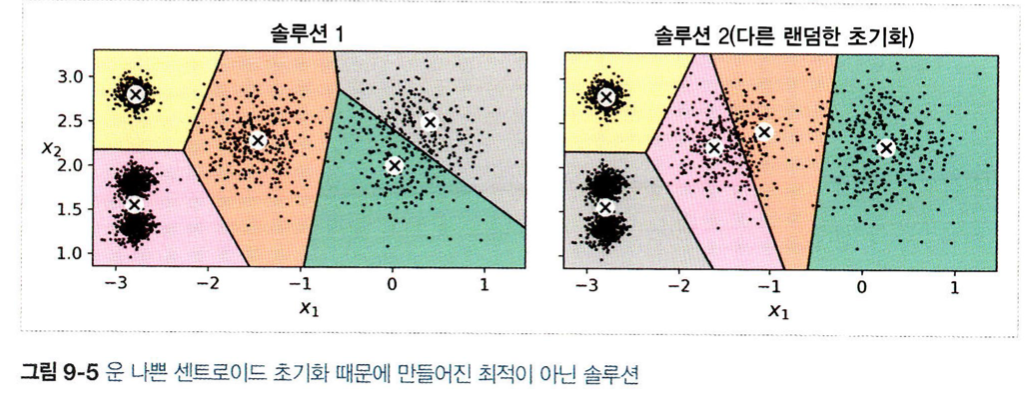


In [ ]:
# 데이터 불러오기
from sklearn.datasets import make_blobs
import numpy as np

# 추가 코드 - make_blobs()의 정확한 인수는 중요하지 않습니다.
blob_centers = np.array([[ 0.2, 2.3], [-1.5 , 2.3], [-2.8, 1.8],
[-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
random_state=7)

In [ ]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

`labels_`: 알고리즘이 샘플에 할당한 클러스터의 인덱스

In [ ]:
y_pred

array([2, 4, 1, ..., 0, 1, 4], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

`cluster_centers_`: 알고리즘이 찾은 센트로이드

In [ ]:
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [ ]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 0, 0], dtype=int32)

하드 군집 : 샘플을 하나의 클러스터에 할당

소프트 군집 : 클러스터마다 샘플에 점수(샘플과 센트로이드 사이의 거리)를 부여

`transform()`메서드는 샘플과 각 센트로이드 사이의 거리를 반환

In [ ]:
kmeans.transform(X_new)

array([[2.9042344 , 0.32995317, 2.88633901, 1.49439034, 2.81093633],
       [5.84739223, 2.80290755, 5.84236351, 4.4759332 , 5.80730058],
       [0.29040966, 3.29399768, 1.71086031, 1.69136631, 1.21475352],
       [0.36159148, 3.21806371, 1.21567622, 1.54808703, 0.72581411]])

**센트로이드 초기화 방법**

`init` : 센트로이드 리스트를 담은 넘파이 배열을 지정.

`n_init`: 랜덤 초기화 횟수(기본값 10)

In [ ]:
good_init = np.array([[-3,3],[-3,-2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1)

최선의 솔류선은 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리 이니셔(inertia)를 통해 평가.

`inertia_`를 통해 확인 가능

`score()`는 `inertia_`의 음숫값.(사이킷런은 큰 값이 가장 좋은 값으로 인식하기 때문)

In [ ]:
y_pred = kmeans.fit_predict(X)
kmeans.inertia_

223.2921606917702

In [ ]:
kmeans.score(X)

-223.29216069177022

**k-평균++ 알고리즘**

다른 센트로이드와 거리가 먼 센트로이드를 선택하는 똑똑한 초기화 단계 도입.(반복 횟수를 크게 줄일 수 있다는 이점)

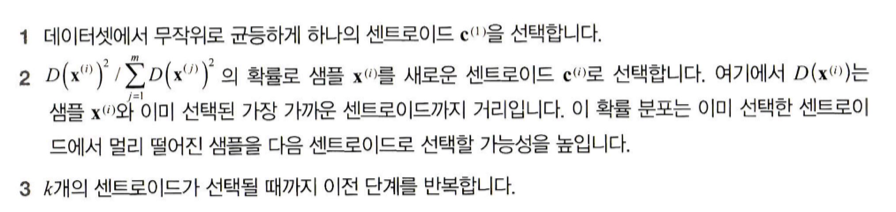

**k-평균 속도 개선**

k-평균 속도 개선을 위해 삼각부등식(AB + BC >= AC), 샘플과 센트로이드 사이의 거리를 위한 상한선과 하한선 거리를 유지하는 방식 활용.

`algorithm = full`

**미니 배치 k-평균**

전체 데이터셋을 사용해 반복하지 않고 이 알고리즘은 각 반복마다 미니배치를 활용해 센트로이드를 조금씩 움직임.

대량 데이터셋: `memmap` 사용 / `MiniBatchKMeans.partial_fit()`로 한번에 하나의 미니배치 전달

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

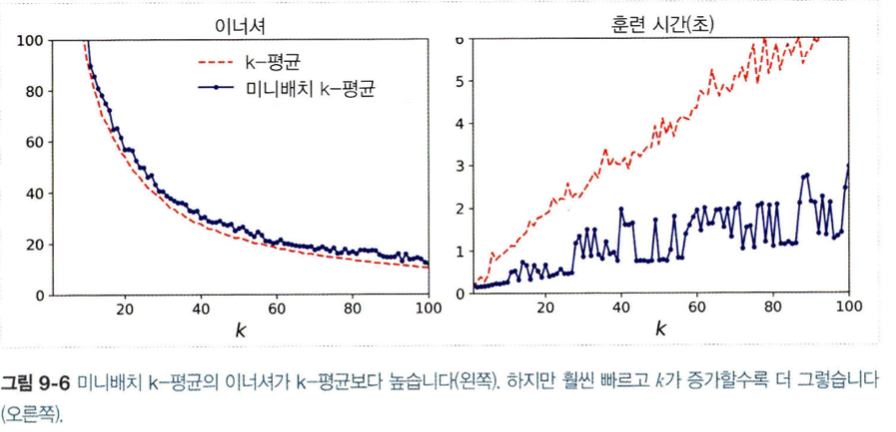

미니배치 k-평균 알고리즘은 k-평균 알고리즘보다 훨씬 빠르지만 이니셔는 일반적으로 조금 더 나쁨.

**최적의 클러스터 수 찾기**

k를 어떻게 설정할까?

이니셔를 평가 지표로 활용하게 된다면, k가 증가함에 따라 이니셔가 작아지기 때문에(당연히) 좋은 지표가 아님.

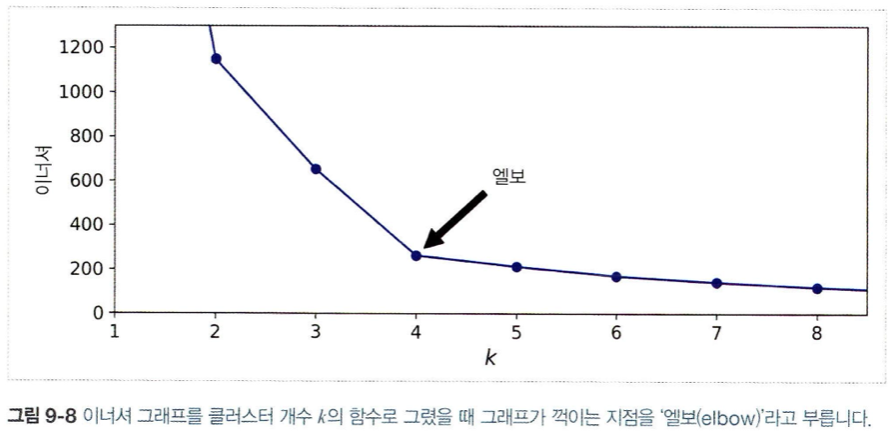

엘보: 이니셔 그래프를 클러스터 개수 k의 함수로 그렸을 때 그래프가 꺾이는 지점.

더 좋은 방법은 모든 샘플에 대한 실루엣 계수의 평균을 구한 실루엣 점수를 활용하는 것.

실루엣 계수 = $\frac{(b-a)}{max(a,b)}$

* a: 동일한 클러스터에 있는 다른 샘플까지의 평균 거리(클러스터 내부의 평균 거리)
* b: 가장 가까운 클러스터까지 평균 거리

-1~1 사이의 값을 가지며, `silhouette_score()`함수를 사용하여 계산.



In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

np.float64(0.629776248749872)

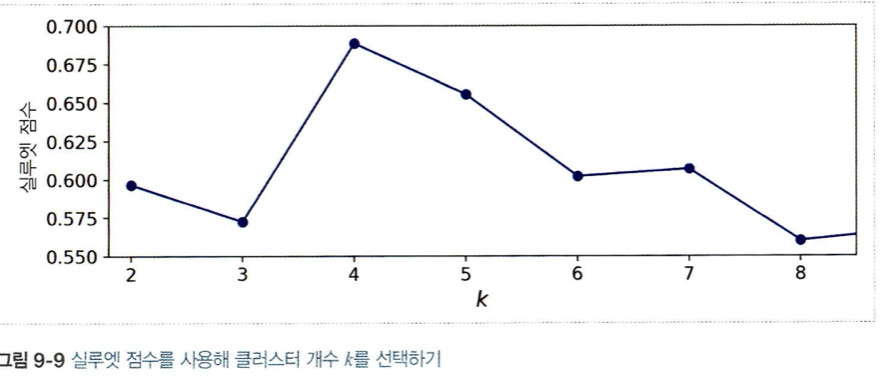

k=4, k=5가 좋은 선택.

실루엣 다이어그램 : 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬하여 그림.

높이는 클러스터가 포함하고 있는 샘플 수를 의미, 너비는 이 클래스에 포함된 샘플의 정렬된 실루엣 계수를 나타냄. 수직 파선은 각 클러스터에 해당하는 실루엣 점수.

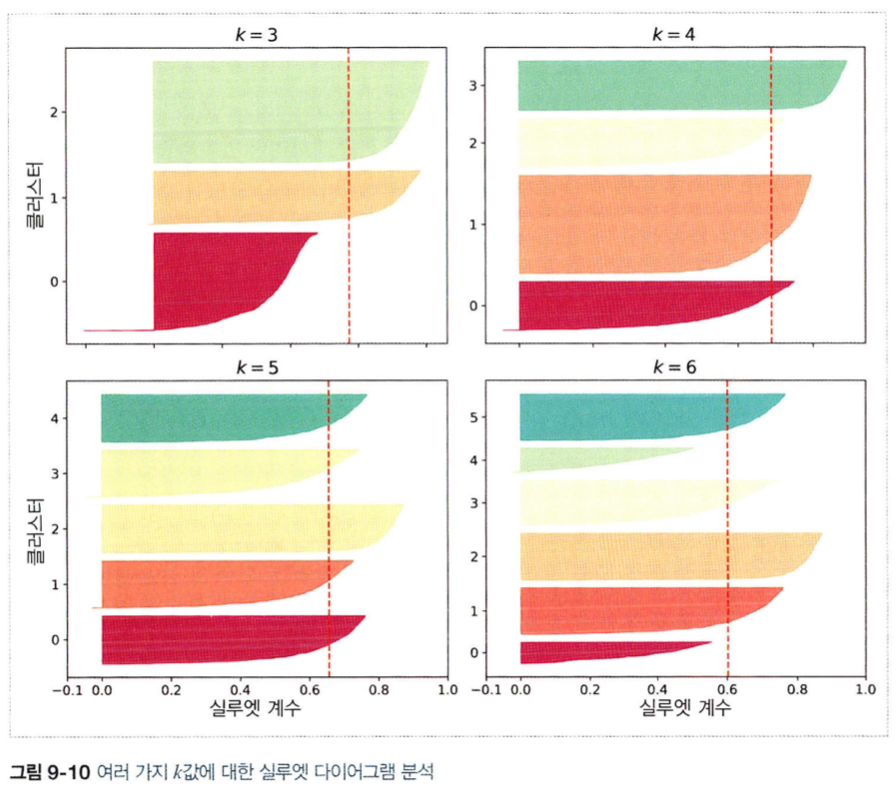

#### 9.1.2 k-평균의 한계
k-평균은 속도가 빠르고 확장성이 용이하지만, 최적이 아닌 솔루션을 피하기 위해 알고리즘을 여러번 실행 및 클러스터 개수 지정 필요. 클러스터마다 크기/밀접도가 다르거나 원형이 아니면 한계를 가짐

데이터에 따라 잘 맞는 군집 알고리즘이 다름

타원형 클러스터는 가우시란 혼합 모델 사용

```
k-평균을 실행하기 전에 특성의 스케일을 맞추는 것이 중요.
```

#### 9.1.3 군집을 활용한 이미지 분할
이미지 분할은 이미지를 세그먼트 여러 개로 분할하는 작업. 시멘틱 분할에서는 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당됨.

In [3]:
from matplotlib.image import imread # or from imageio import imread
image = imread('/content/ladybug.png')
image.shape # 3d 배열로 표현

(533, 800, 3)

* 첫 번째 차원: 높이
* 두 번째 차원: 너비
* 세 번째 차원: 컬러 채널 개수(RGB). 각 픽셀에 대해 빨강, 초록, 파랑의 강도를 담은 3d 벡터.(0.0~1.0 사이)

In [6]:
X = image.reshape(-1,3) # 색상의 긴 리스트로 변환
kmeans = KMeans(n_clusters=8).fit(X) # kmeans를 활용해 이 색상을 클러스터로 모음
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

Text(0.5, 1.0, '8_col')

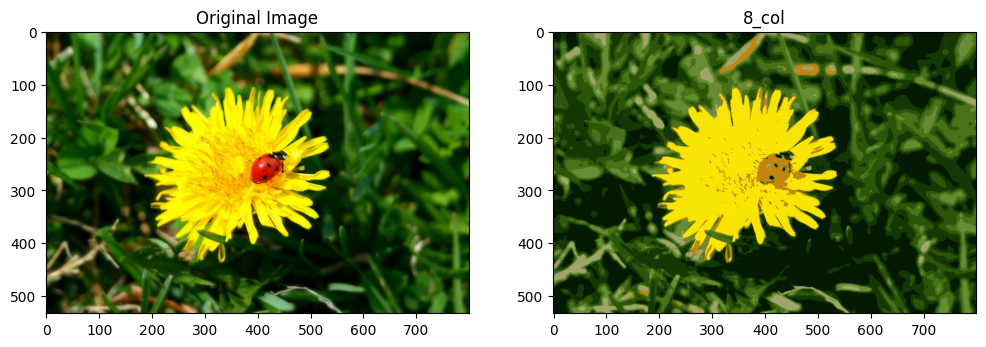

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 원본 이미지
ax[0].imshow(image)
ax[0].set_title('Original Image')

# 8 색상
ax[1].imshow(segmented_img)
ax[1].set_title('8_col')

#### 9.1.4 군집을 이용한 전처리
군집은 차원축소에 효과적으로 활용될 수 있음.

In [11]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
log_reg.score(X_test,y_test)

0.9688888888888889

K-평균을 전처리 단계로 사용해 더 좋아지는지 살펴보자.

In [17]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('kmeans',KMeans(n_clusters=50)),
    ('log_reg',LogisticRegression())
])
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [18]:
pipeline.score(X_test,y_test)

0.9688888888888889

`n_cluster`개수를 임의로 지정. 교재에서는 정확도가 올라갔으나 해당 코드에서는 그렇지 않음.

실루엣분석 / 이너셔 감소여부를 확인할 필요 X ➡️ 교차 검증에서 가장 좋은 분류 성능을 내는 k값이 최적의 값. `GridSearchCV` 활용

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 0)
grid_clf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=False)

In [26]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 94}
0.9666666666666667


#### 9.1.5 군집을 사용한 준지도학습
레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용

In [27]:
# 레이블된 50개 샘플에 로지스틱 회귀 모델 훈련
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

In [28]:
# 테스트 데이터셋에 대해 사용
log_reg.score(X_test,y_test)

0.7711111111111111

개선 방안

1) 훈련 세트를 50개의 클러스터로 모음

2) 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾음 (**= 대표 이미지**)

In [34]:
k = 50
kmeans = KMeans(n_clusters = k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist,axis = 0)
X_representative_digits = X_train[representative_digit_idx]

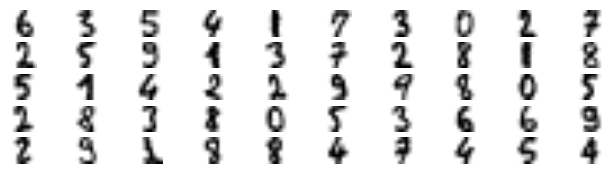

In [35]:
plt.figure(figsize=(8, 2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [36]:
y_representative_digits = np.array([6,3,5,4,1,7,3,0,2,7,2,5,9,1,3,7,2,8,1,8,5,1,4,2,2,9,9,8,0,5,2,8,3,8,0,5,3,6,6,9,2,9,1,8,8,4,7,4,5,4])

In [37]:
# 확인
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test,y_test)

0.8955555555555555

성능 향상됨. 무작위의 샘플에 레이블을 할당한 것이 아니라 각 클러스터를 대표하는 이미지에 레이블을 할당했기 때문.

레이블 전파 : 레이블을 동일한 클러스터에 있는 모든 샘플로 전파

In [40]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [41]:
# 모델 훈련 및 성능 확인
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9155555555555556

센트로이드와 가까운 샘플의 20%에만 레이블 전파한 후 결과 확인

위의 레이블 전파는 대표 이미지의 레이블을 동일한 클러스터에 있는 "모든" 샘플로 전파했으므로 클러스터 경계에 가깝게 위치한 샘플까지 포함됨 >> 레이블이 잘못 부여되었을 확률이 큼

In [43]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [44]:
# 모델 훈련 및 성능 확인
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8955555555555555

In [45]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

np.float64(0.9756944444444444)

실제로 전파된 레이블과 실제 레이블이 97% 일치

#### 9.1.6 DBSCAN

밀집도를 추정할 수 있는 군집 알고리즘

밀집된 연속적 지역을 클러스터로 정의

작동방식:

- 각 샘플에서 작은 거리 내에 샘플의 개수 셈(ℇ-이웃)
- ℇ-이웃 내에 min_samples 이상의 샘플이 있다면 핵심 샘플로 간주(밀집 지역)
- 핵심 심플의 이웃에 있는 모든 샘플은 동일한 클러스터. 이웃의 이웃도 계속해서 하나의 클러스터로 형성
- 핵심 샘플도 이웃 샘플도 아니면 이상치로 판단
- 모든 클러스터가 충분히 밀접되어 있고, 밀접되어 있지 않은 지역과 잘 구분될 때 좋은 성능을 냄

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

`labels_`에 모든 샘플의 레이블은 인스턴스 변수 저장

In [47]:
dbscan.labels_

array([ 0,  1,  1,  2,  2,  2,  3,  3,  4,  5,  3,  9,  4,  3, -1,  3,  3,
        2, -1,  6,  3,  3,  7,  0,  6,  3,  3,  4,  8,  3, -1,  4, -1,  4,
        3,  0,  3,  9, -1,  9,  4,  6,  9,  6,  6,  3, -1,  3,  2,  6,  1,
        2,  9,  6, -1,  0,  6,  9,  3,  6,  2, -1,  8,  0, -1,  3,  9,  3,
        1,  0,  5,  4,  1,  0,  2,  8,  1,  3, 10,  0, -1,  4,  4,  1,  3,
        9,  4,  3,  9,  6,  3,  3,  4,  3, -1,  4,  3,  2,  2,  8,  8,  3,
        4,  1,  3,  1,  2,  4,  3,  2,  1,  6,  2,  1,  3, -1,  9,  3,  3,
        9,  9,  9,  3,  3,  2,  2,  2, -1,  3,  3,  2,  3,  4,  1,  3,  9,
       -1,  9,  6, 11,  5,  6,  3,  0,  3,  7,  6,  9,  3,  1,  1,  0,  2,
        6,  6, -1,  2,  3,  1,  5,  9,  6,  9,  6,  2, -1,  1,  3,  9,  3,
        9,  3,  2,  9,  2,  6, -1,  6, -1,  9,  1,  6,  1, -1,  6,  9,  3,
        5,  3,  0,  3,  1,  9,  1,  9,  1,  4,  1,  3,  3,  3,  3,  5,  9,
        3,  1,  3,  3,  9,  3,  3,  0,  6,  4,  9,  2,  4,  3,  9,  8,  5,
        3,  3,  2, -1,  1

샘플의 클러스터가 -1인 경우는 알고리즘이 해당 샘플을 이상치로 판단.

`core_sample_indices_`에서 핵심 샘플의 인덱스를 확인 가능

`components_`에서 핵심 샘플 자체 확인 가능

In [48]:
# 핵심 샘플의 인덱스 : core_sample_indices_
print(len(dbscan.core_sample_indices_))
dbscan.core_sample_indices_

782


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  12,  13,  16,
        17,  19,  21,  22,  23,  25,  27,  28,  29,  31,  33,  34,  35,
        36,  37,  39,  40,  41,  42,  43,  44,  45,  47,  48,  49,  50,
        51,  52,  53,  55,  56,  57,  59,  60,  62,  63,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  78,  79,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  95,  97,  98,
        99, 101, 104, 105, 106, 107, 108, 110, 111, 112, 114, 117, 118,
       119, 120, 121, 122, 123, 124, 126, 128, 129, 130, 131, 132, 133,
       134, 135, 138, 140, 142, 144, 147, 148, 149, 150, 153, 154, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170,
       171, 172, 173, 175, 179, 181, 182, 184, 185, 186, 187, 189, 190,
       191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       206, 207, 208, 209, 210, 212, 213, 214, 215, 217, 218, 219, 220,
       221, 222, 223, 226, 227, 229, 231, 232, 233, 235, 236, 23

In [50]:
# 핵심 샘플 자체 : components_
dbscan.components_

array([[-0.22031239,  1.03508658],
       [ 1.97451142,  0.27697698],
       [ 1.75101639, -0.13812578],
       ...,
       [-0.98918124,  0.2521167 ],
       [ 0.22372389, -0.15849555],
       [ 1.08343515, -0.45390002]])

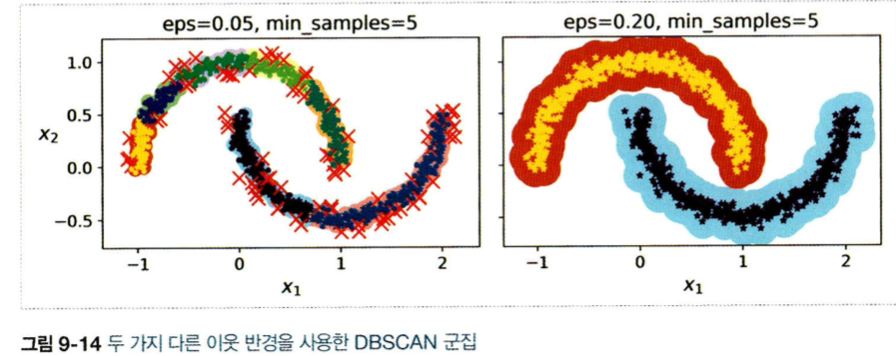

클러스터를 7개 만들고 많은 샘플을 이상치로 판단함

➡️ eps 0.2로 증가시킨 결과 오른쪽과 같은 완벽한 군집을 얻음(eps 증가 시 샘플의 이웃 범위를 넓힘)

`predict()` 메서드 제공하지 않음, `fit_predict()` 메서드 제공

DBSCAN 알고리즘은 새로운 샘플에 대해 클러스터를 예측할 수 없음.

In [54]:
# knn_clf를 활용하여 클러스터 예측 수행
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [57]:
X_new = np.array([[-0.5,0], [0,0.5], [1,-0.1], [2,1]])
knn.predict(X_new)

array([9, 3, 6, 1])

In [58]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.42, 0.46, 0.  ,
        0.02],
       [0.  , 0.  , 0.  , 0.94, 0.  , 0.02, 0.  , 0.02, 0.  , 0.  , 0.  ,
        0.02],
       [0.  , 0.  , 0.  , 0.36, 0.  , 0.  , 0.56, 0.  , 0.  , 0.  , 0.08,
        0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ]])

In [59]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  7, 10, -1])

#### 9.1.7 기타 군집 알고리즘
* 병합 군집
* BIRCH
* 평균-이동
* 유사도 전파
* 스펙트럼 군집